In [1]:
import tensorflow as tf
import numpy as np

imdb = tf.keras.datasets.imdb



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()


In [4]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
#len(train_data[0])

In [8]:
#[max(sequence) for sequence in train_data]

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

In [10]:
#Sample Test
a = [[1, 5, 70], [5, 10], [50, 1]]

z = np.zeros((len(a), 71))
z[0, a[0]] = 3
print(z)

print(vectorize_sequences(a, 100))

[[0. 3. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.

In [11]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')


In [13]:
models = tf.keras.models
layers = tf.keras.layers



In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
optimizers = tf.keras.optimizers
losses = tf.keras.losses
metrics = tf.keras.metrics

In [17]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [18]:
xval=x_train[:10000]
partial_x_train = x_train[10000:]
yval=y_train[:10000]
partial_y_train=y_train[10000:]

In [19]:
history=model.fit(partial_x_train, 
                  partial_y_train, 
                  epochs=4, 
                  batch_size=512, 
                  validation_data=(xval, yval))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 146us/step - loss: 0.5056 - binary_accuracy: 0.7882 - val_loss: 0.3861 - val_binary_accuracy: 0.8577
Epoch 2/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.2985 - binary_accuracy: 0.9037 - val_loss: 0.3051 - val_binary_accuracy: 0.8861
Epoch 3/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.2183 - binary_accuracy: 0.9297 - val_loss: 0.2820 - val_binary_accuracy: 0.8889
Epoch 4/4
15000/15000 [==============================] - 2s 125us/step - loss: 0.1737 - binary_accuracy: 0.9438 - val_loss: 0.2758 - val_binary_accuracy: 0.8882


In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['binary_accuracy']
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

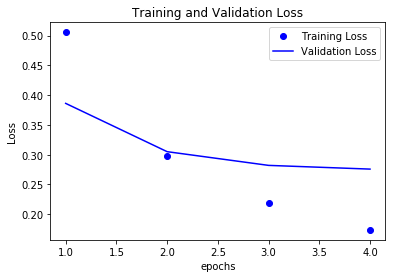

In [21]:
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

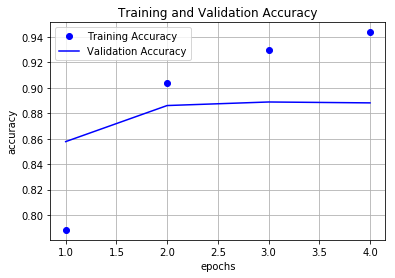

In [22]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy") 
plt.grid()
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 82us/step


In [24]:
results

[0.2980786302471161, 0.87956]

In [ ]:
m